# Fun with FFT

Charles Boncelet, boncelet@udel.edu

In [39]:
import sys
%pylab inline
from scipy.fftpack import fft, ifft


Populating the interactive namespace from numpy and matplotlib


In [2]:
fft?

In [40]:
x = array([1,-1,1,-1])
fft(x)

array([0.+0.j, 0.+0.j, 4.+0.j, 0.-0.j])

In [41]:
fft(x,n=8)

array([0.+0.j        , 1.+0.41421356j, 0.-0.j        , 1.+2.41421356j,
       4.+0.j        , 1.-2.41421356j, 0.+0.j        , 1.-0.41421356j])

In [42]:
xz = r_[x,zeros(4)]
xz

array([ 1., -1.,  1., -1.,  0.,  0.,  0.,  0.])

In [43]:
fft(xz)

array([0.+0.j        , 1.+0.41421356j, 0.-0.j        , 1.+2.41421356j,
       4.+0.j        , 1.-2.41421356j, 0.+0.j        , 1.-0.41421356j])

In [44]:
c_[x,zeros(4)]

array([[ 1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.]])

In [45]:
y = fft(x)
xhat = ifft(y)

In [51]:
print("x: ", x)
print("xhat: ", xhat)
print("x - xhat: ", x-xhat)

x:  [ 1 -1  1 -1]
xhat:  [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]
x - xhat:  [0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [53]:
x2 = rand(1024*1024)
y2 = fft(x2)
x2hat = ifft(y2)
r = x2-x2hat
r[:10]

array([ 0.00000000e+00+0.00000000e+00j,  1.11022302e-16+6.59330446e-17j,
        0.00000000e+00+3.35639357e-17j,  0.00000000e+00+5.73542949e-17j,
       -1.11022302e-16+1.98951099e-17j,  0.00000000e+00-4.08066593e-17j,
        0.00000000e+00+3.09460936e-17j, -1.11022302e-16-7.27635183e-17j,
        0.00000000e+00-7.20670427e-17j,  1.66533454e-16-1.37520544e-16j])

In [54]:
max(abs(x2-x2hat))

1.0650092362497182e-15

In [55]:
x2hat[:10]

array([0.83255924+0.00000000e+00j, 0.29286229-6.59330446e-17j,
       0.84425956-3.35639357e-17j, 0.89104153-5.73542949e-17j,
       0.62987644-1.98951099e-17j, 0.39392502+4.08066593e-17j,
       0.93368759-3.09460936e-17j, 0.16266179+7.27635183e-17j,
       0.8727453 +7.20670427e-17j, 0.36560462+1.37520544e-16j])

In [56]:
real(x2hat)[:10]

array([0.83255924, 0.29286229, 0.84425956, 0.89104153, 0.62987644,
       0.39392502, 0.93368759, 0.16266179, 0.8727453 , 0.36560462])

(0, 8)

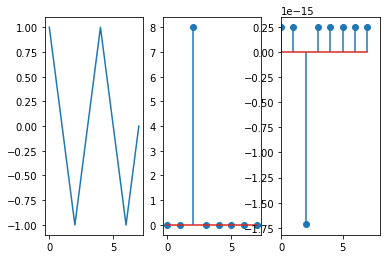

In [62]:
#x = array([0,0,0,1,0,0,0,0]) + 1j*array([0,0,0,0,0,0,0,0])
x = exp(1j*2*2*pi*arange(8)/8)
y = fft(x)
subplot(1,3,1)
plot(real(x))
subplot(1,3,2)
stem(real(y), use_line_collection=True)
subplot(1,3,3)
stem(imag(y), use_line_collection=True)
xlim([0,8])

<StemContainer object of 3 artists>

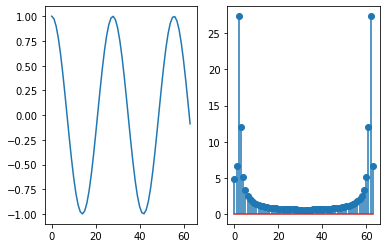

In [68]:
import matplotlib.pyplot as plt
N=64
omega = 2.3*2*pi/N
n = arange(N)

x = cos(omega*n)
y = fft(x)
#plt.plot(n,x)
subplot(1,2,1)
plot(x)
subplot(1,2,2)
stem(abs(y), use_line_collection=True)

## Signal Filtering with FFTs

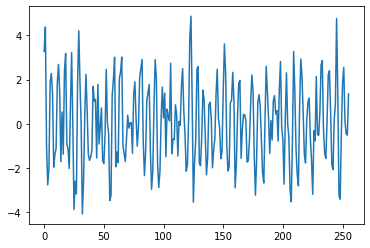

In [74]:
N=256
sigma = 1.0
omega = 2*pi*35.5/N
omega2 = 2*pi*44/N
#x = exp(omega*1j*arange(N))
x = cos(omega*arange(N))+2*cos(omega2*arange(N))
x += sigma*randn(N)
y = fft(x)
plot(x)

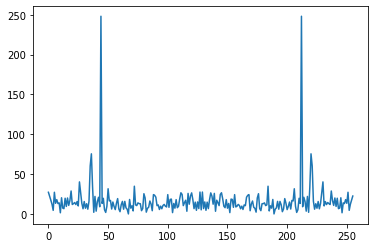

In [73]:
plot(abs(y))

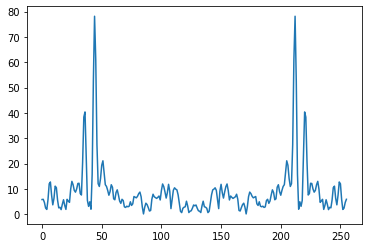

In [75]:
from scipy.signal import kaiser
window = kaiser(N,beta=14)
plot(abs(fft(x*window)))

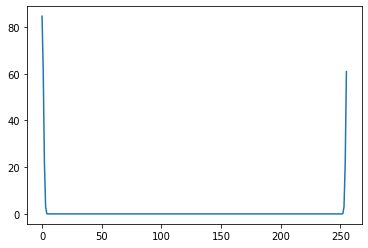

In [76]:
plot(abs(fft(window)))

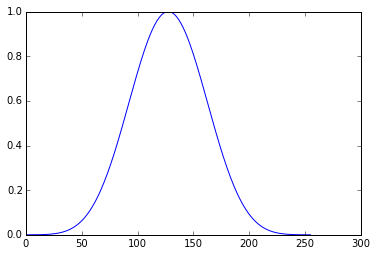

In [21]:
plot(window)